In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path=r"your_data.csv"
df = pd.read_csv(data_path)


#df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)
df.head()  


,hearing(left),relaxation,hemoglobin,Gtp,LDL,serum creatinine,Urine protein,fasting blood sugar,age,waist(cm),triglyceride,smoking
0,1,87,16.5,27,75,1.0,1,94,55,81.0,300,1
1,2,83,16.2,37,126,1.1,1,147,70,89.0,55,0
2,1,75,17.4,53,93,0.8,1,79,20,81.0,197,1
3,1,88,15.9,30,102,1.0,1,91,35,105.0,203,0
4,1,76,15.4,17,93,0.8,1,91,30,80.5,87,1


In [143]:


df.info()  
df.describe() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hearing(left)        159256 non-null  int64  
 1   relaxation           159256 non-null  int64  
 2   hemoglobin           159256 non-null  float64
 3   Gtp                  159256 non-null  int64  
 4   LDL                  159256 non-null  int64  
 5   serum creatinine     159256 non-null  float64
 6   Urine protein        159256 non-null  int64  
 7   fasting blood sugar  159256 non-null  int64  
 8   age                  159256 non-null  int64  
 9   waist(cm)            159256 non-null  float64
 10  triglyceride         159256 non-null  int64  
 11  smoking              159256 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 14.6 MB


,hearing(left),relaxation,hemoglobin,Gtp,LDL,serum creatinine,Urine protein,fasting blood sugar,age,waist(cm),triglyceride,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,1.023974,76.874071,14.796965,36.216004,114.607682,0.892764,1.074233,98.352552,44.306626,83.001990,127.616046,0.437365
std,0.152969,8.994642,1.431213,31.204643,28.158931,0.179346,0.347856,15.329740,11.842286,8.957937,66.188989,0.496063
min,1.000000,44.000000,4.900000,2.000000,1.000000,0.100000,1.000000,46.000000,20.000000,51.000000,8.000000,0.000000
25%,1.000000,70.000000,13.800000,18.000000,95.000000,0.800000,1.000000,90.000000,40.000000,77.000000,77.000000,0.000000
50%,1.000000,78.000000,15.000000,27.000000,114.000000,0.900000,1.000000,96.000000,40.000000,83.000000,115.000000,0.000000
75%,1.000000,82.000000,15.800000,44.000000,133.000000,1.000000,1.000000,103.000000,55.000000,89.000000,165.000000,1.000000
max,2.000000,133.000000,21.000000,999.000000,1860.000000,9.900000,6.000000,375.000000,85.000000,127.000000,766.000000,1.000000


## Finding Duplicates and the percentage of nulls in each column

In [144]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().any()]

if not features_with_na:  
    print("No missing values found in any column!")
else:
    for feature in features_with_na:
        missing_percentage = np.round(df[feature].isnull().mean() * 100, 4)
        print(f"{feature}: {missing_percentage}% missing values")
        
num_duplicates = df.duplicated().sum()        
print(f"number of duplcated rows is {num_duplicates}")
        

No missing values found in any column!
number of duplcated rows is 1


## univariate

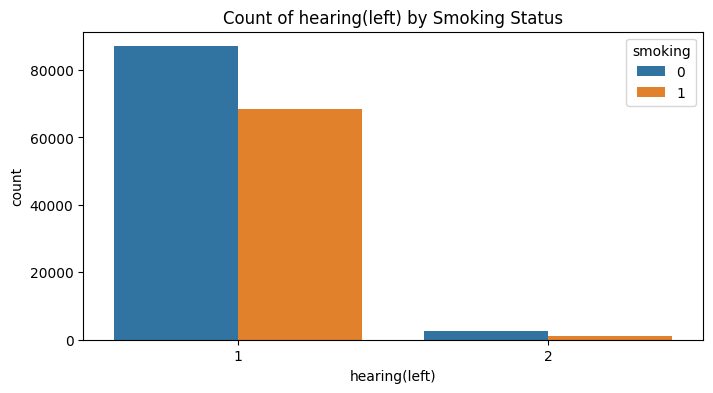

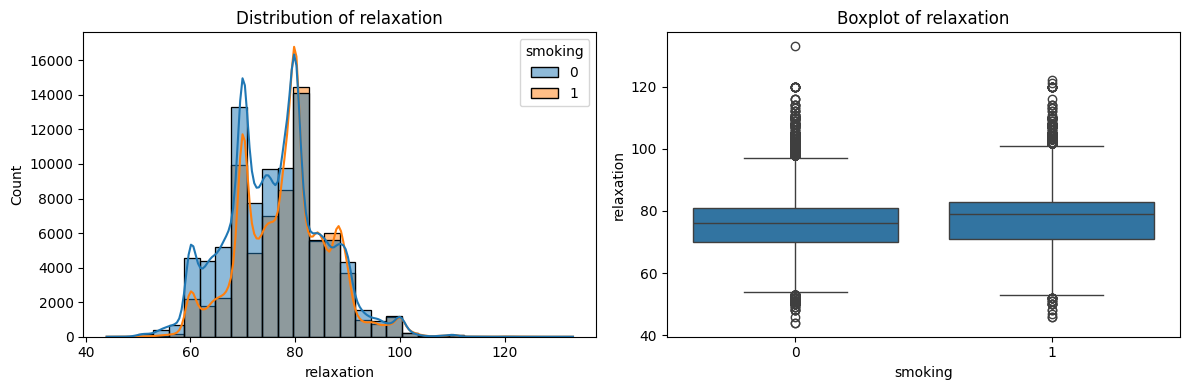

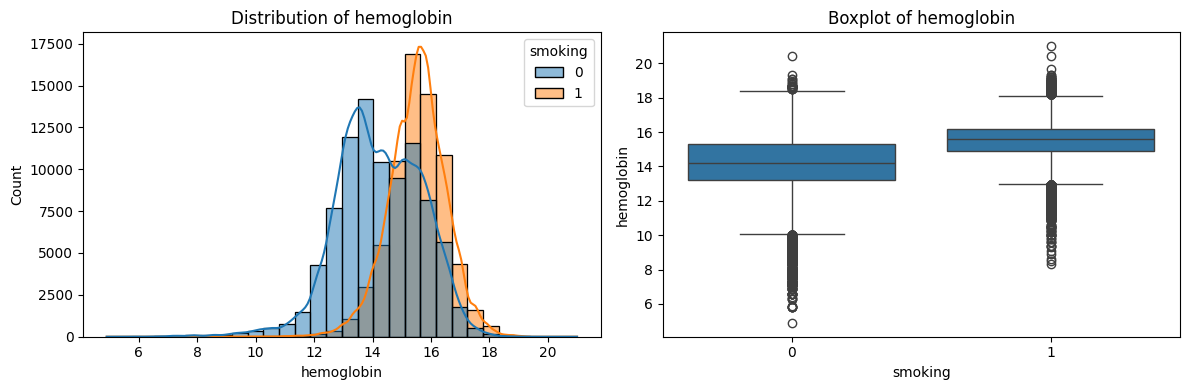

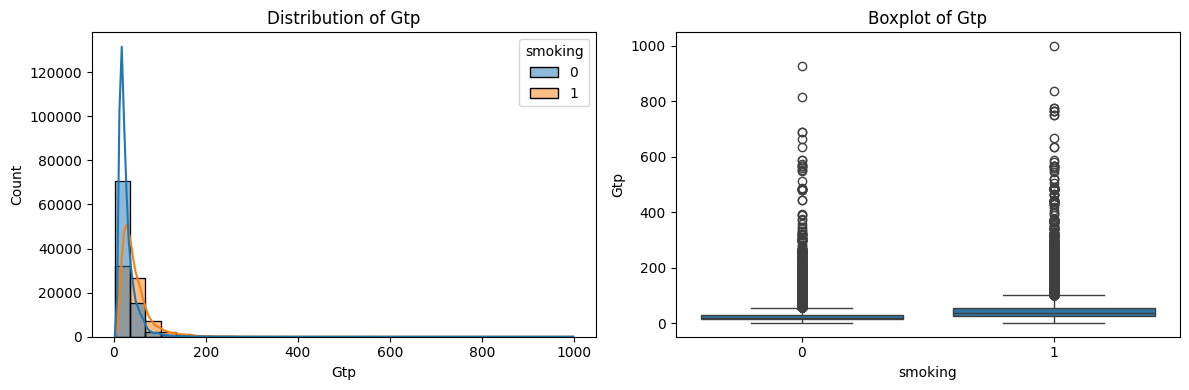

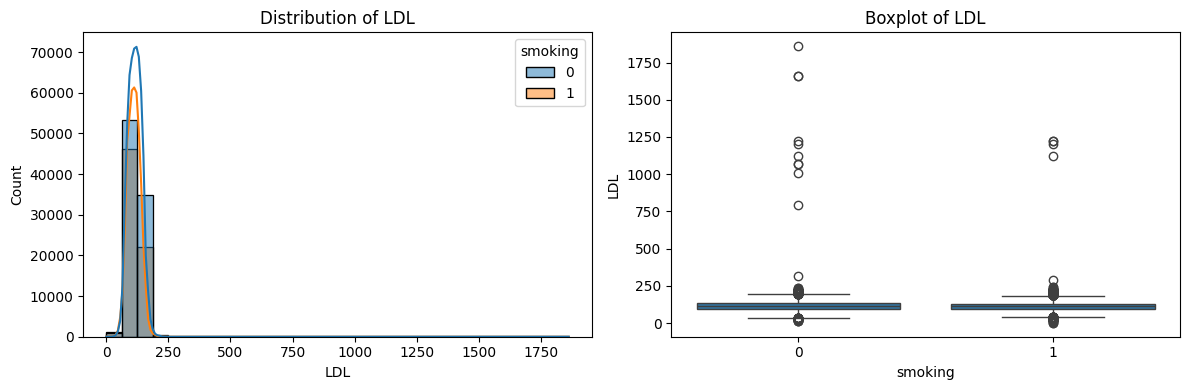

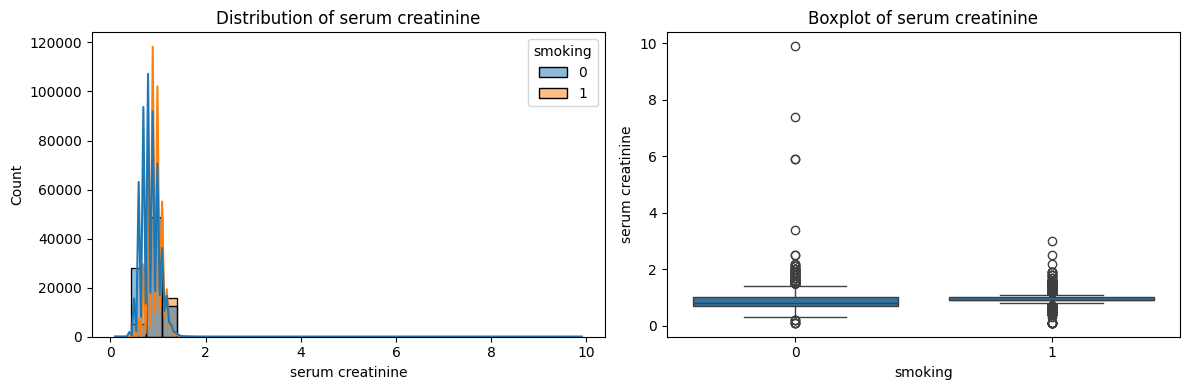

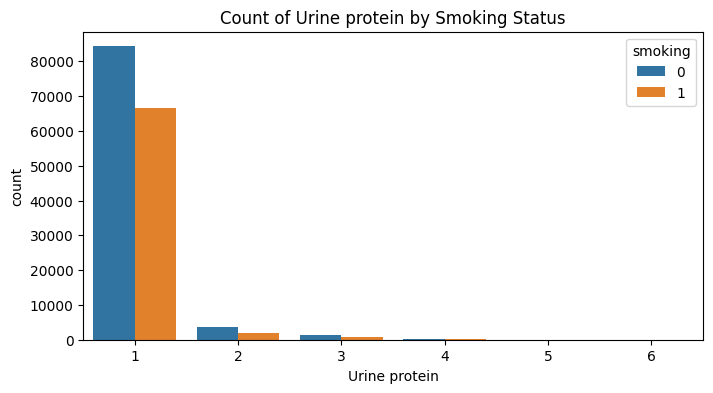

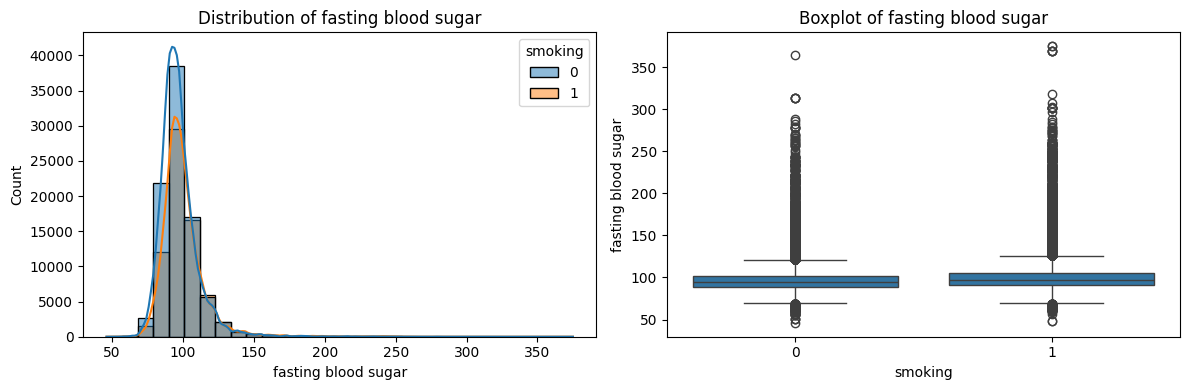

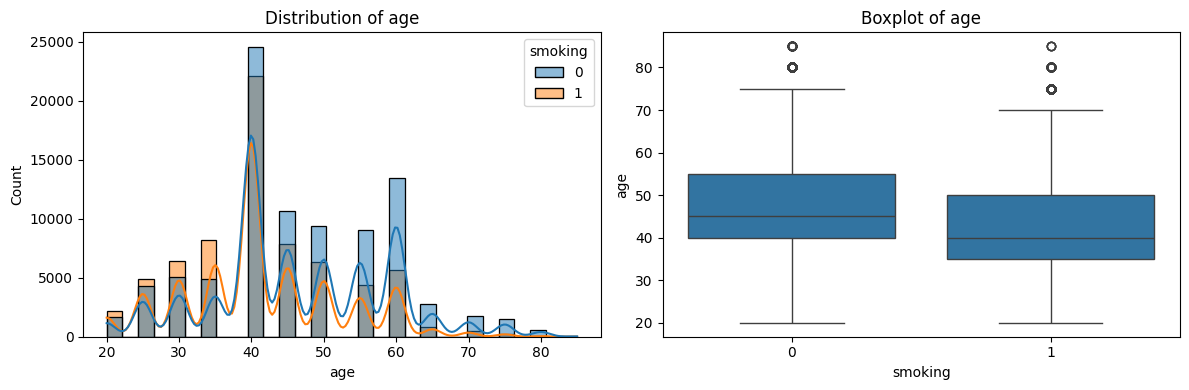

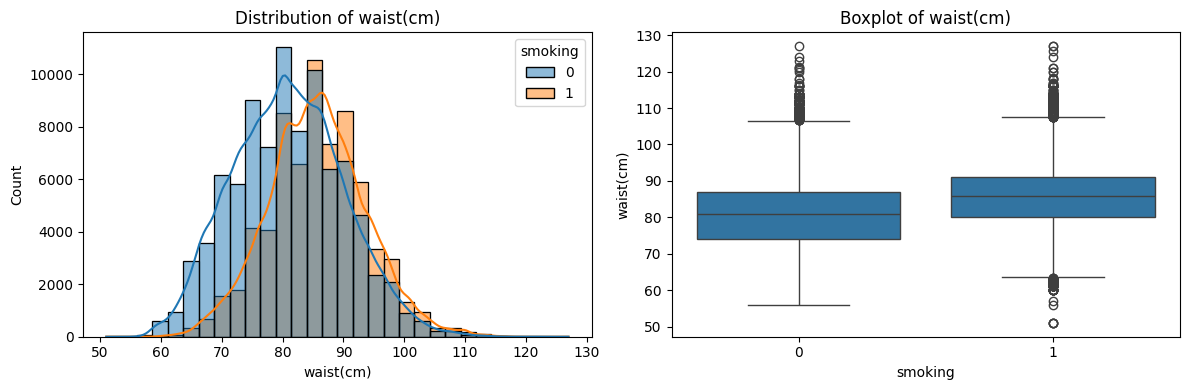

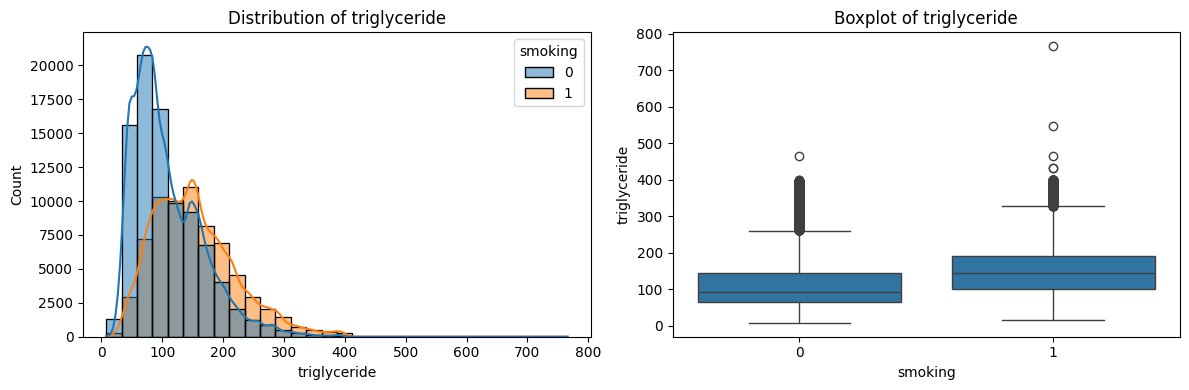

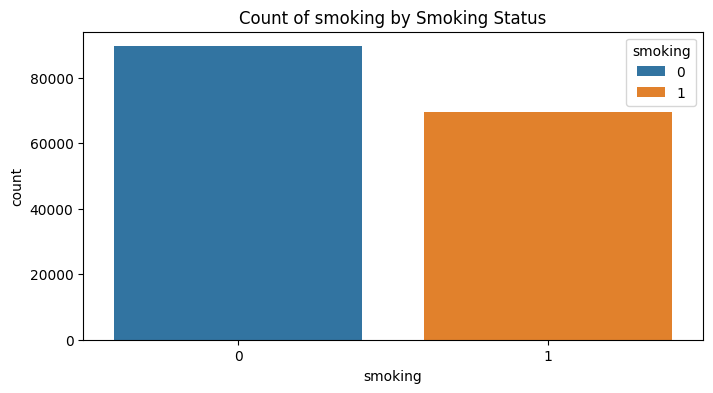

In [145]:


categorical_cols = ['hearing(left)', 'Urine protein', 'smoking']
numerical_cols = [col for col in df.columns if col not in categorical_cols]


for col in df.columns:
    if col in categorical_cols:
        
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue='smoking')
        plt.title(f'Count of {col} by Smoking Status')
        plt.show()
    else:
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, kde=True, hue='smoking',  bins=30, alpha=0.5)
        plt.title(f'Distribution of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x='smoking', y=col)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [146]:
df.corr()  #correlations with values close to 0 ==> drop

,hearing(left),relaxation,hemoglobin,Gtp,LDL,serum creatinine,Urine protein,fasting blood sugar,age,waist(cm),triglyceride,smoking
hearing(left),1.000000,-0.011739,-0.051724,-0.021820,-0.011467,-0.009447,-0.007248,0.025334,0.212889,0.004759,-0.035088,-0.038219
relaxation,-0.011739,1.000000,0.230445,0.186684,0.073838,0.091648,-0.020445,0.152416,0.064924,0.291389,0.196251,0.109501
hemoglobin,-0.051724,0.230445,1.000000,0.306108,0.043565,0.461178,-0.024466,0.094061,-0.280851,0.418245,0.338815,0.450679
Gtp,-0.021820,0.186684,0.306108,1.000000,0.031424,0.180120,-0.016268,0.148289,-0.046879,0.294166,0.301060,0.305561
LDL,-0.011467,0.073838,0.043565,0.031424,1.000000,0.030572,-0.014978,0.010165,0.103529,0.114552,0.030834,-0.072285
serum creatinine,-0.009447,0.091648,0.461178,0.180120,0.030572,1.000000,0.000255,0.057923,-0.143808,0.294176,0.195891,0.272979
Urine protein,-0.007248,-0.020445,-0.024466,-0.016268,-0.014978,0.000255,1.000000,0.009406,-0.004526,-0.029491,-0.047448,-0.028548
fasting blood sugar,0.025334,0.152416,0.094061,0.148289,0.010165,0.057923,0.009406,1.000000,0.191913,0.209541,0.176266,0.096534
age,0.212889,0.064924,-0.280851,-0.046879,0.103529,-0.143808,-0.004526,0.191913,1.000000,-0.045369,-0.038063,-0.206033
waist(cm),0.004759,0.291389,0.418245,0.294166,0.114552,0.294176,-0.029491,0.209541,-0.045369,1.000000,0.394593,0.262715


Column	                     Min Valid	    Max Valid	


hemoglobin	                 5 g/dL	    20 g/dL 
Gtp (γ-GT)	                 5 U/L	    300 U/L	    
LDL	                         50 mg/dL	300 mg/dL	 
serum creatinine	         0.5 mg/dL	10 mg/dL	 
Urine protein	             1 (Normal)	6 (Severe)	 
fasting blood sugar	         50 mg/dL	300 mg/dL	




# Remove physiologically impossible values (world-record min/max thresholds)
# Sources: WHO, NIH, and clinical laboratory guidelines

In [147]:
df.drop_duplicates()
def remove_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR        
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_wrong_values(df, min_val, max_val, column):
    return df[(df[column] >= min_val) & (df[column] <= max_val)]

minimum = [5, 5, 50, 0.5, 1, 50]
maximum = [20, 300, 300, 10, 6, 300]
columns = ['hemoglobin', 'Gtp', 'LDL', 'serum creatinine', 'Urine protein', 'fasting blood sugar']

for min_val, max_val, column in zip(minimum, maximum, columns):
    df = remove_wrong_values(df, min_val, max_val, column)

        


## Bivariate

C:\Users\ecc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


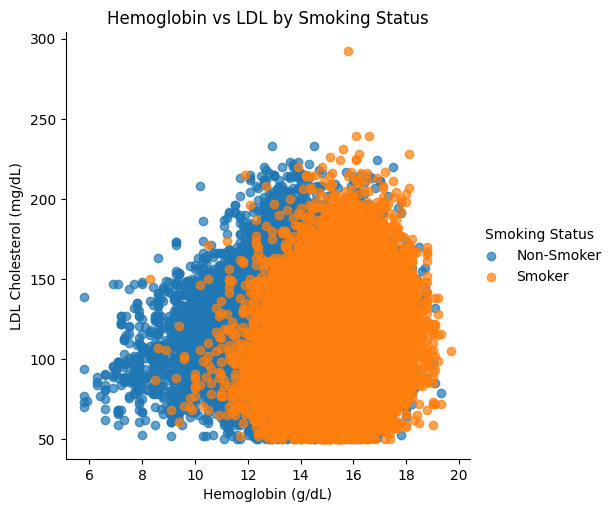

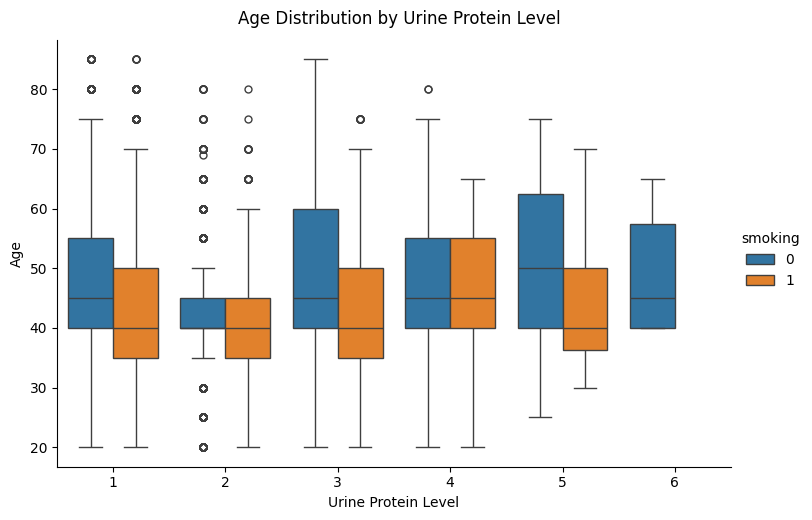

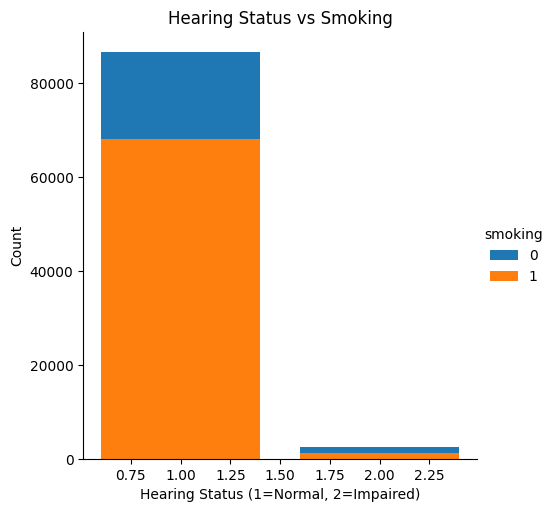

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt


g1 = sns.FacetGrid(df, hue="smoking", height=5)
g1.map(plt.scatter, "hemoglobin", "LDL", alpha=0.7)
g1.add_legend(title="Smoking Status", labels=["Non-Smoker", "Smoker"])
plt.title("Hemoglobin vs LDL by Smoking Status")
plt.xlabel("Hemoglobin (g/dL)")
plt.ylabel("LDL Cholesterol (mg/dL)")
plt.show()


g2 = sns.catplot(
    data=df,
    x="Urine protein",
    y="age",
    hue="smoking",
    kind="box",
    height=5,
    aspect=1.5,
    order=[1, 2, 3, 4, 5, 6]  # assuming these are valid categories in your data
)

g2.set_axis_labels("Urine Protein Level", "Age")
g2.fig.suptitle("Age Distribution by Urine Protein Level", y=1.03)
plt.show()


cross_tab = pd.crosstab(df['hearing(left)'], df['smoking'])
g3 = sns.FacetGrid(cross_tab.unstack().reset_index(), hue='smoking', height=5)
g3.map(plt.bar, "hearing(left)", 0)  # 0 represents the count values
g3.add_legend()
plt.title("Hearing Status vs Smoking")
plt.xlabel("Hearing Status (1=Normal, 2=Impaired)")
plt.ylabel("Count")
plt.show()

# multivariate

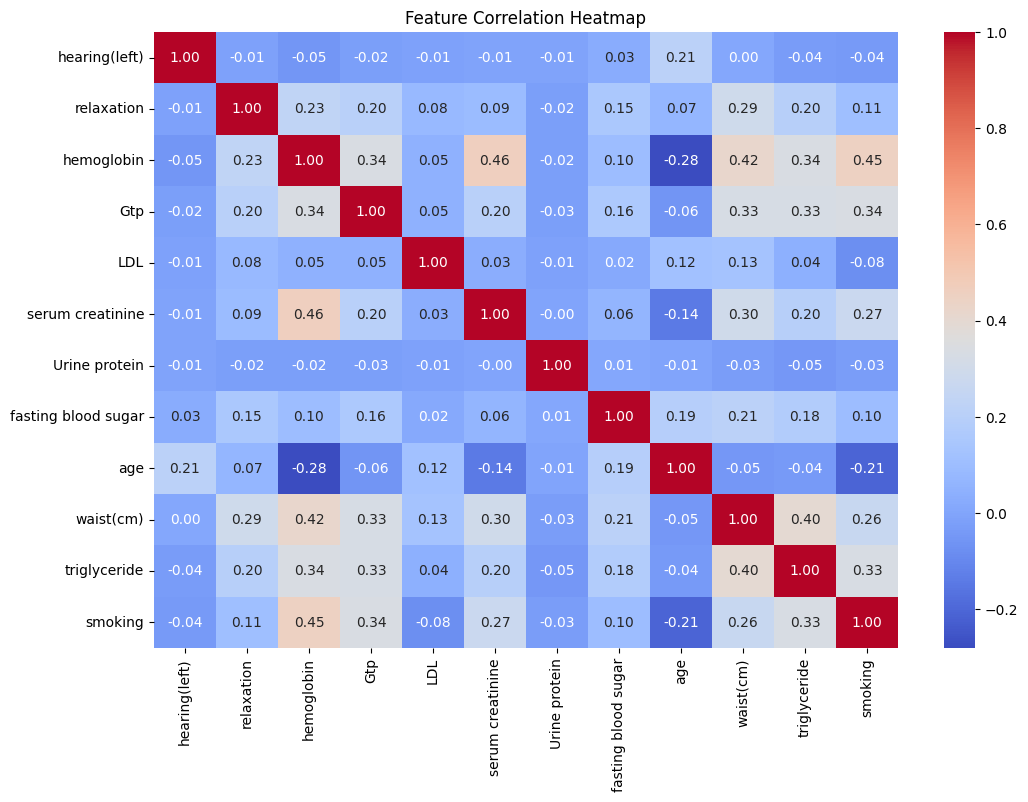

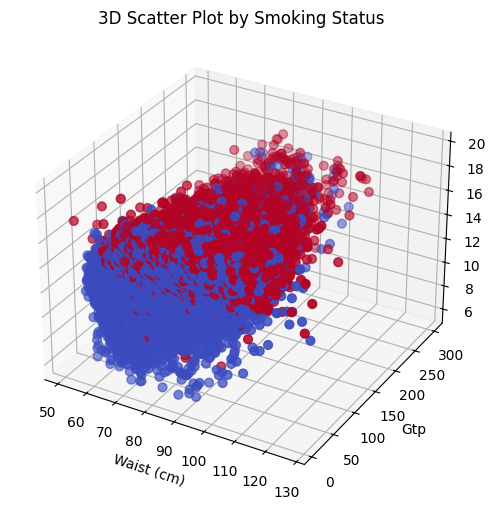

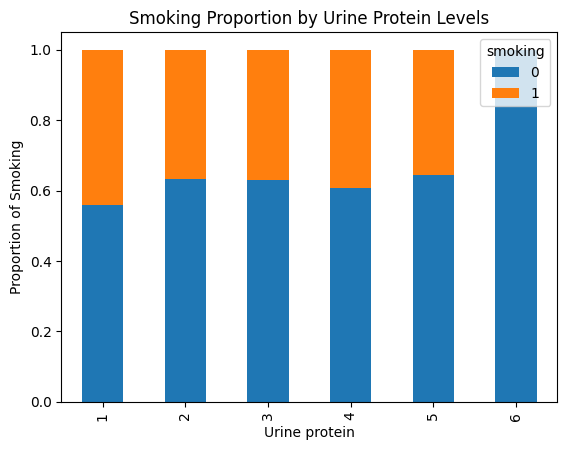

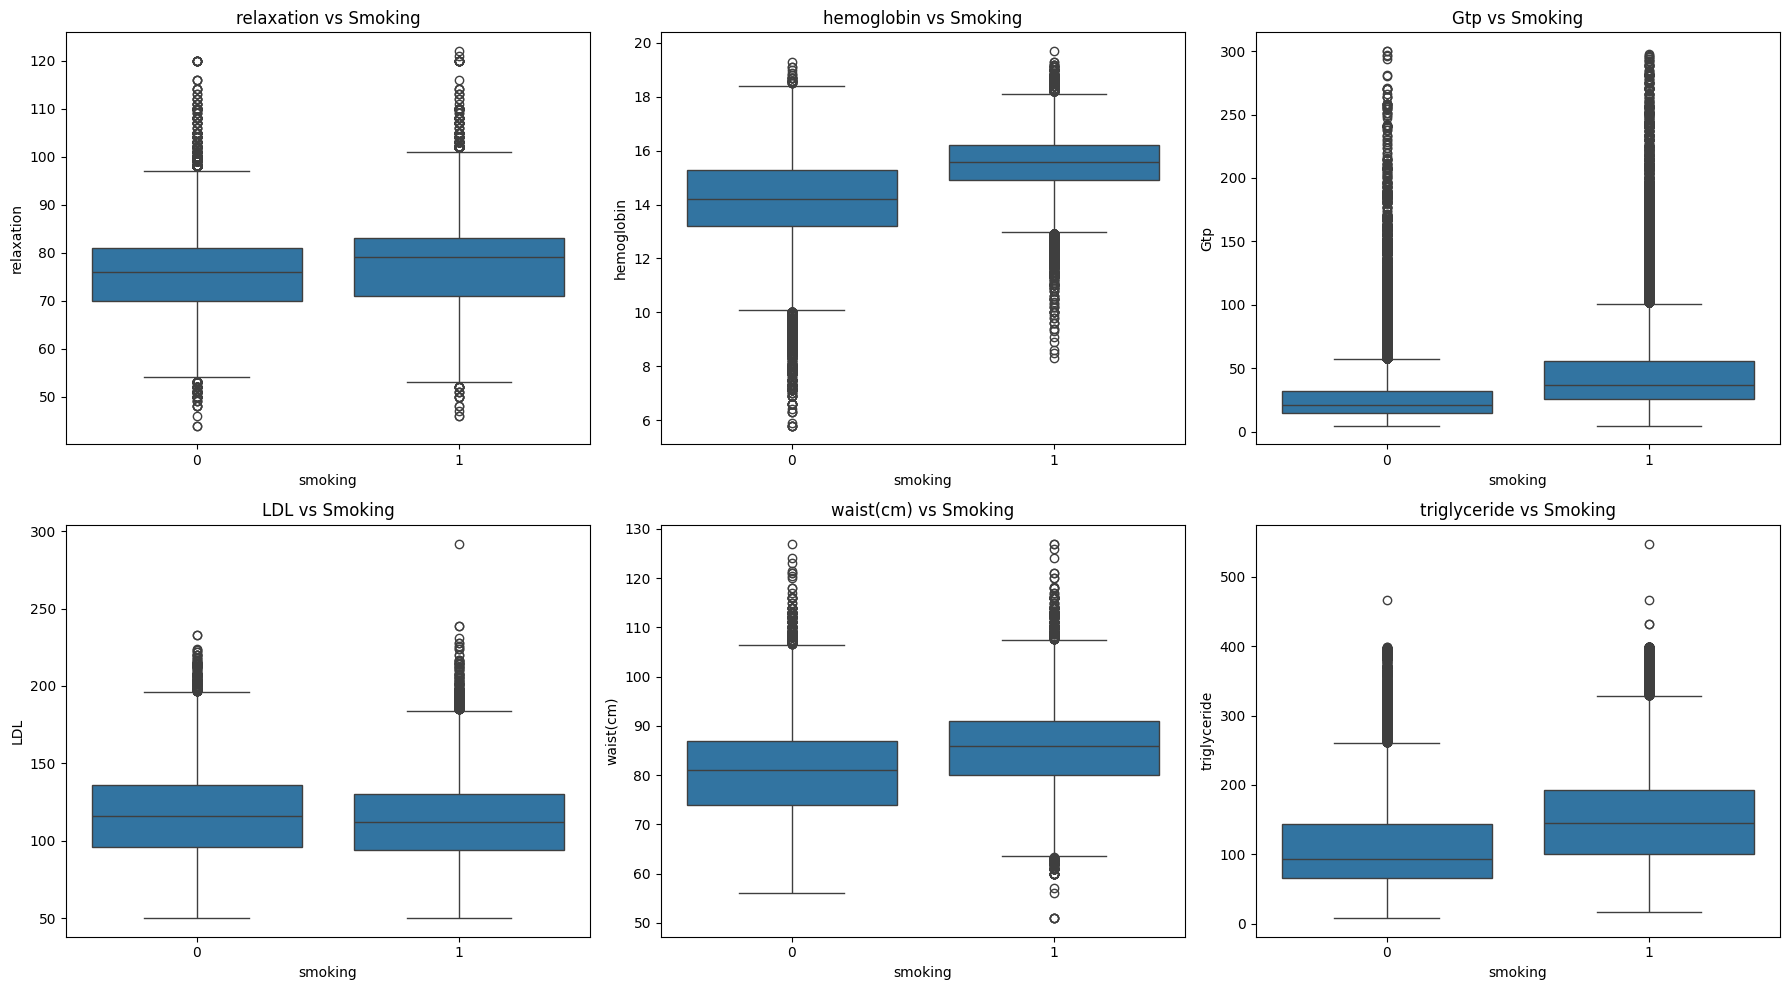

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2})

#sns.pairplot(df[['hemoglobin', 'Gtp', 'LDL', 'waist(cm)', 'age', 'smoking']], hue='smoking')
#plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['waist(cm)']
y = df['Gtp']
z = df['hemoglobin']
c = df['smoking']

scatter = ax.scatter(x, y, z, c=c, cmap='coolwarm', s=40)
ax.set_xlabel('Waist (cm)')
ax.set_ylabel('Gtp')
ax.set_zlabel('Hemoglobin')
plt.title('3D Scatter Plot by Smoking Status')
plt.show()

df.groupby('Urine protein')['smoking'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Smoking')
plt.title('Smoking Proportion by Urine Protein Levels')
plt.show()

features = ['relaxation', 'hemoglobin', 'Gtp', 'LDL', 'waist(cm)', 'triglyceride']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='smoking', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Smoking')

plt.tight_layout()
plt.show()






## Feature Extraction (creating additional features that the model can benifit from )

In [150]:
import pandas as pd

# Assume your DataFrame is named df

# 1. Binary flags based on median thresholds
df['high_hemoglobin'] = (df['hemoglobin'] > df['hemoglobin'].median()).astype(int)
df['high_triglyceride'] = (df['triglyceride'] > df['triglyceride'].median()).astype(int)
df['high_Gtp'] = (df['Gtp'] > df['Gtp'].median()).astype(int)
df['large_waist'] = (df['waist(cm)'] > df['waist(cm)'].median()).astype(int)
df['high_relaxation'] = (df['relaxation'] > df['relaxation'].median()).astype(int)

# 2. Interaction features
df['gtp_waist'] = df['Gtp'] * df['waist(cm)']
df['triglyceride_relaxation'] = df['triglyceride'] * df['relaxation']
df['age_hemoglobin'] = df['age'] * df['hemoglobin']

# 3. Binned features (categorical buckets)
df['waist_bin'] = pd.cut(df['waist(cm)'], bins=[0, 70, 85, 100, 200], labels=[0, 1, 2, 3])
df['gtp_bin'] = pd.cut(df['Gtp'], bins=[0, 20, 40, 80, 200], labels=[0, 1, 2, 3])
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 90], labels=[0, 1, 2, 3])

# Convert binned features to integers (handle NaNs first)
df['waist_bin'] = df['waist_bin'].cat.add_categories([-1]).fillna(-1).astype(int)
df['gtp_bin'] = df['gtp_bin'].cat.add_categories([-1]).fillna(-1).astype(int)
df['age_bin'] = df['age_bin'].cat.add_categories([-1]).fillna(-1).astype(int)


# Convert binned features to integers (optional)
df['waist_bin'] = df['waist_bin'].astype(int)
df['gtp_bin'] = df['gtp_bin'].astype(int)
df['age_bin'] = df['age_bin'].astype(int)

# 4. Urine protein binarization
df['urine_protein_flag'] = df['Urine protein'].apply(lambda x: 1 if x >= 5 else 0)

# 5. Composite risk score
df['smoking_risk_score'] = (
    df['high_hemoglobin'] +
    df['high_triglyceride'] +
    df['high_Gtp'] +
    df['large_waist'] +
    df['high_relaxation']
)

# Optional: Display new features
new_features = [
    'high_hemoglobin', 'high_triglyceride', 'high_Gtp', 'large_waist', 'high_relaxation',
    'gtp_waist', 'triglyceride_relaxation', 'age_hemoglobin',
    'waist_bin', 'gtp_bin', 'age_bin',
    'urine_protein_flag', 'smoking_risk_score'
]
print(df[new_features].head())


   high_hemoglobin  high_triglyceride  high_Gtp  large_waist  high_relaxation  \
0                1                  1         0            0                1   
1                1                  0         1            1                1   
2                1                  1         1            0                0   
3                1                  1         1            1                1   
4                1                  0         0            0                0   

   gtp_waist  triglyceride_relaxation  age_hemoglobin  waist_bin  gtp_bin  \
0     2187.0                    26100           907.5          1        1   
1     3293.0                     4565          1134.0          2        1   
2     4293.0                    14775           348.0          1        2   
3     3150.0                    17864           556.5          3        1   
4     1368.5                     6612           462.0          1        0   

   age_bin  urine_protein_flag  smoking_risk_score

smoking                    1.000000
hemoglobin                 0.450322
gtp_waist                  0.342268
Gtp                        0.335195
triglyceride               0.332156
triglyceride_relaxation    0.329242
serum creatinine           0.271794
waist(cm)                  0.262812
relaxation                 0.108911
fasting blood sugar        0.096822
urine_protein_flag        -0.004880
Urine protein             -0.029208
hearing(left)             -0.038452
age_hemoglobin            -0.040577
LDL                       -0.076417
age                       -0.206037
Name: smoking, dtype: float64


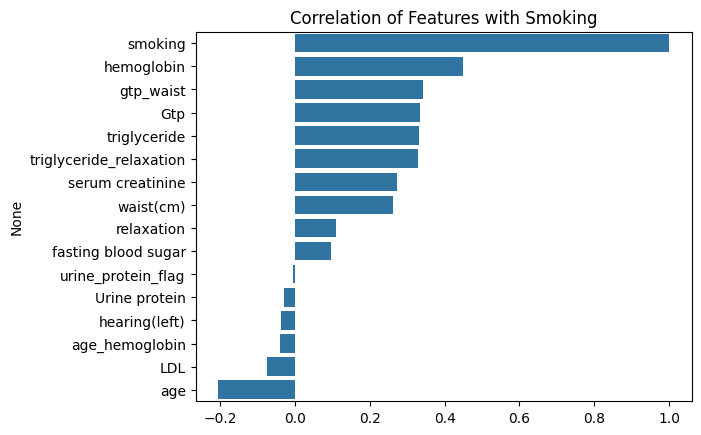

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Include only numeric/binned columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numerical_cols].corr()['smoking'].sort_values(ascending=False)

# Print correlations with smoking
print(correlations)

# Plot correlation with smoking
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Correlation of Features with Smoking")
plt.show()



##  getting the best  n features from our data and dropping the least important 

In [152]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['smoking'])
y = df['smoking']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
f_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print(f_scores)



hemoglobin                 40270.500493
smoking_risk_score         36436.222814
high_hemoglobin            28135.042555
gtp_bin                    26998.266190
high_Gtp                   25661.146122
gtp_waist                  21006.727339
Gtp                        20038.748446
triglyceride               19632.164902
triglyceride_relaxation    19247.499659
high_triglyceride          16086.898094
serum creatinine           12627.671880
waist(cm)                  11745.906337
waist_bin                   9373.010184
large_waist                 7891.086919
age                         7018.474200
age_bin                     5761.879849
relaxation                  1900.384561
high_relaxation             1510.706203
fasting blood sugar         1498.147247
LDL                          929.911713
age_hemoglobin               261.092928
hearing(left)                234.419734
Urine protein                135.176003
urine_protein_flag             3.770774
dtype: float64


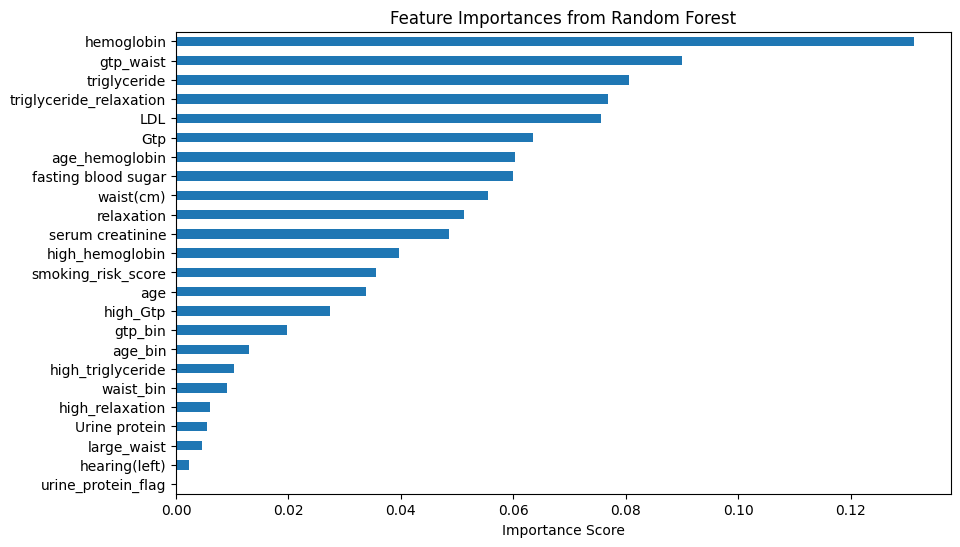

In [153]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.show()


In [154]:
# Step 1: Filter the features based on correlation (>= 0.2)
selected_corr_features = correlations[correlations.abs() > 0.2].index.tolist()

# Step 2: Select top 7 features based on F-score (ANOVA)
top_fscore_features = f_scores.nlargest(7).index.tolist()

# Step 3: Select top 7 features based on RandomForest feature importance
top_rf_features = importances.nlargest(7).index.tolist()

# Step 4: Combine all the feature selections
# We will take the union of all three lists, ensuring no duplicates
selected_features = list(set(selected_corr_features + top_fscore_features + top_rf_features))

# Print the final selected features
print("Final selected features:", selected_features)



Final selected features: ['hemoglobin', 'gtp_bin', 'gtp_waist', 'triglyceride_relaxation', 'serum creatinine', 'Gtp', 'age', 'high_Gtp', 'smoking_risk_score', 'waist(cm)', 'LDL', 'age_hemoglobin', 'smoking', 'triglyceride', 'high_hemoglobin']


In [155]:
# Step 1: Create a new dataframe with only the selected features
new_df = df[selected_features]

# Step 2: Add the target column ('smoking') to the dataframe
new_df['smoking'] = df['smoking']

# Step 3: Write the new dataframe to a CSV file
new_df.to_csv('newdataframe.csv', index=False)

print("New dataframe with selected features has been written to 'newdataframe.csv'.")


C:\Users\ecc\AppData\Local\Temp\ipykernel_33460\1585401058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['smoking'] = df['smoking']


New dataframe with selected features has been written to 'newdataframe.csv'.
